In [1]:
library(Seurat)
library(EnhancedVolcano)

Attaching SeuratObject

Loading required package: ggplot2

Loading required package: ggrepel



In [2]:
load( file = "data/sf1-Mesenchymal-all.Rdata")

In [3]:
pbmc

An object of class Seurat 
43346 features across 349 samples within 1 assay 
Active assay: RNA (43346 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

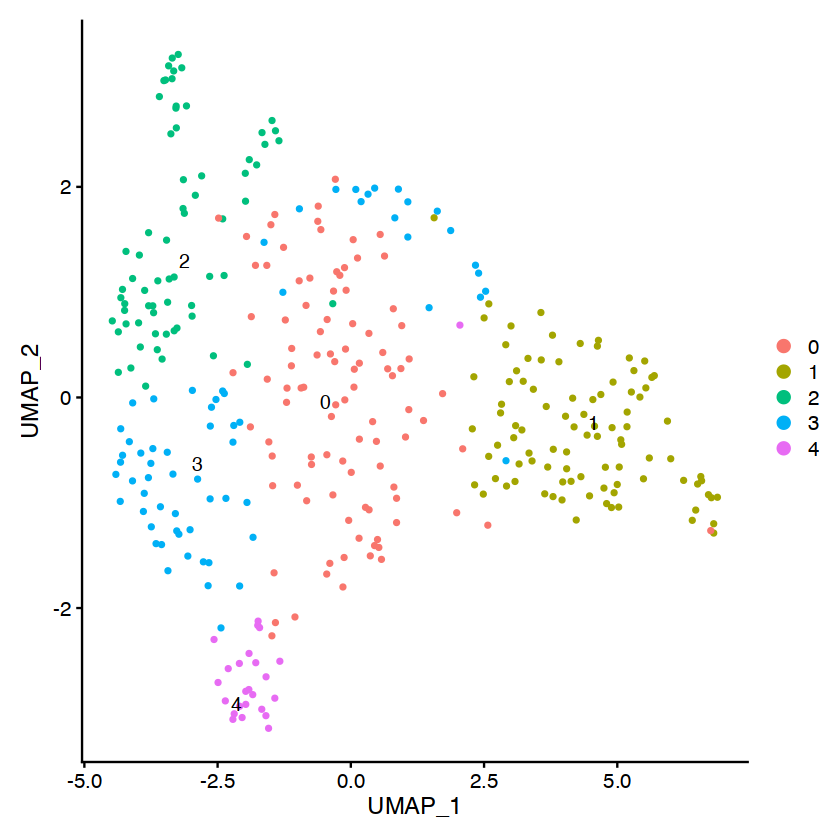

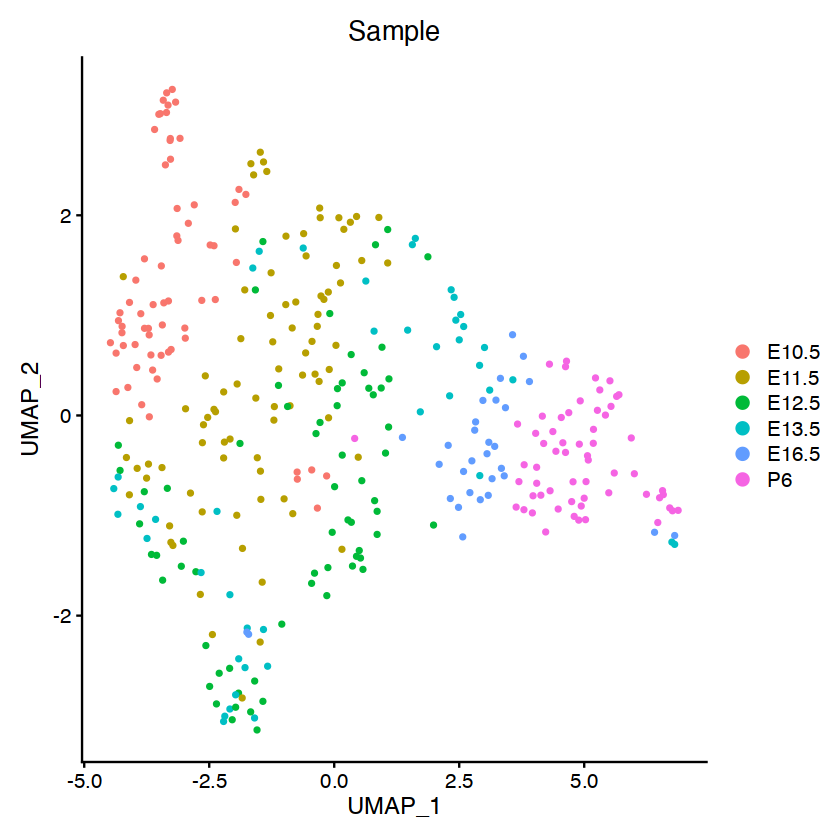

In [4]:
DimPlot(pbmc, reduction = "umap", label = TRUE,  repel = TRUE)
DimPlot(pbmc, reduction = "umap", group.by = "Sample")

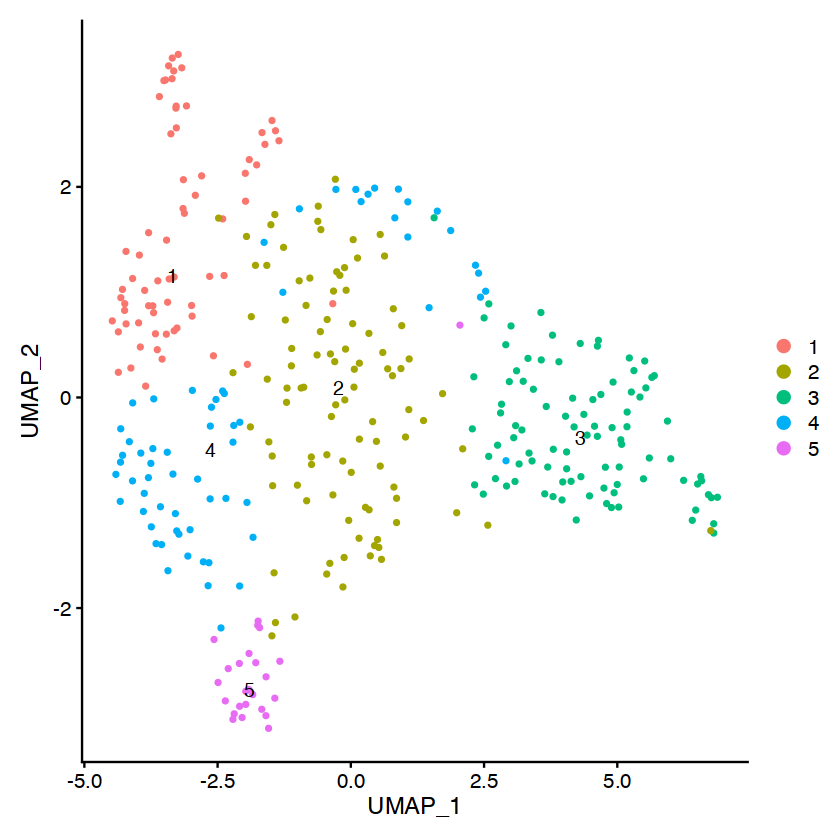

In [5]:
pbmc <- RenameIdents(pbmc, '2' = 'a', '0' = 'b',
                                '1' = 'c','3' = 'd','4' = 'e' )
pbmc <- RenameIdents(pbmc, 'a' = '1', 'b' = '2',
                                'c' = '3','d' = '4','e' = '5' )
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [6]:
library(ggplot2)
library(dittoSeq)

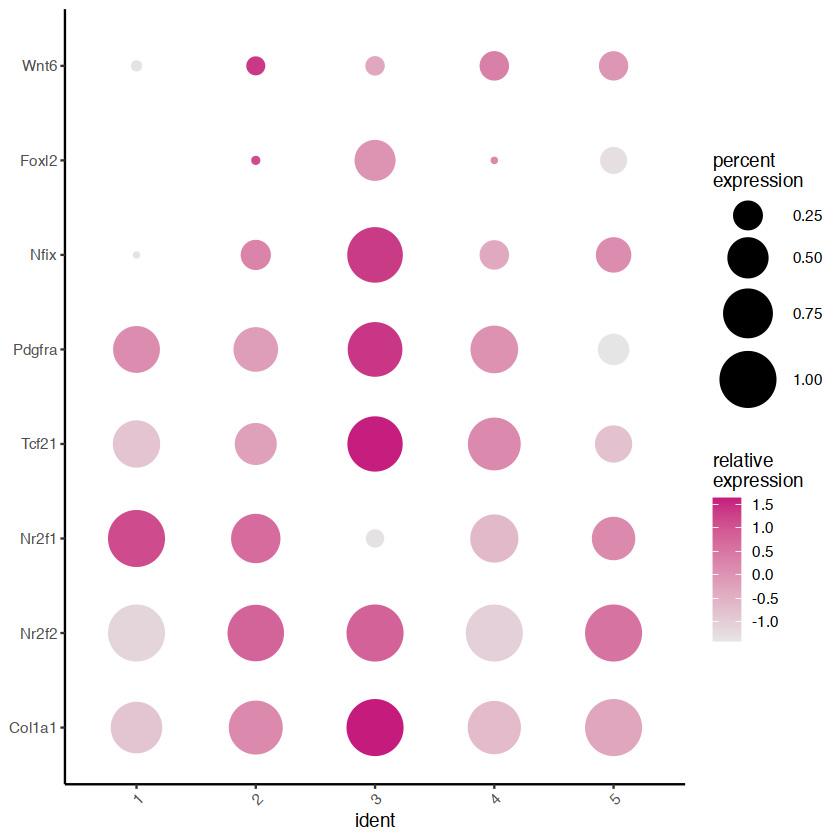

In [7]:
your_markers <- c('Col1a1','Nr2f2','Nr2f1','Tcf21','Pdgfra','Nfix','Foxl2','Wnt6')
dittoDotPlot(pbmc, your_markers, group.by = "ident",size = 15) + coord_flip()

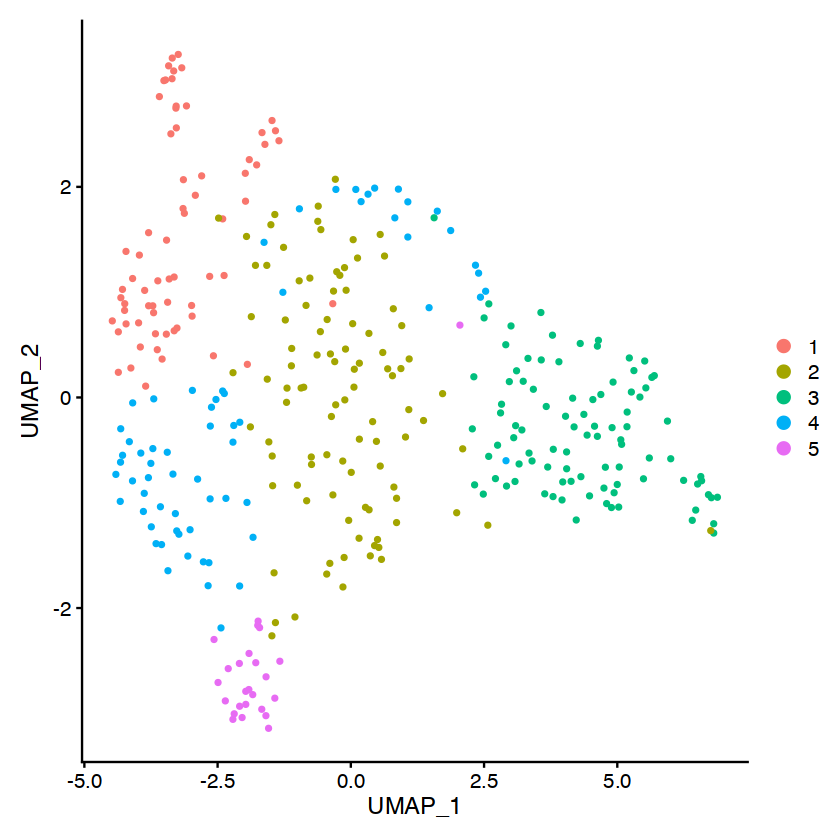

In [8]:
DimPlot(pbmc, reduction = "umap")

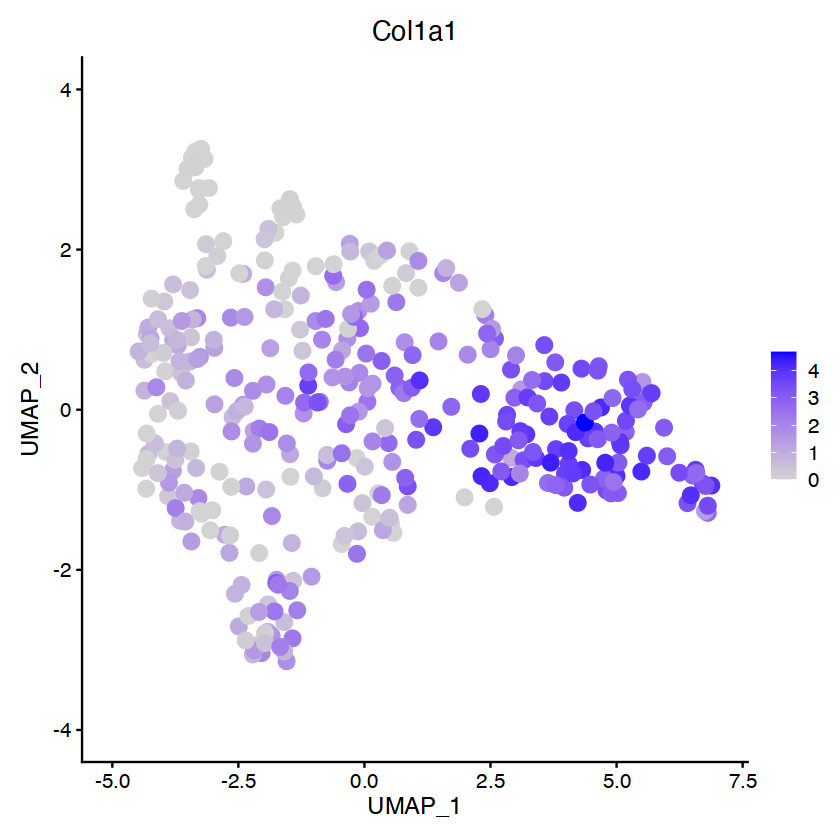

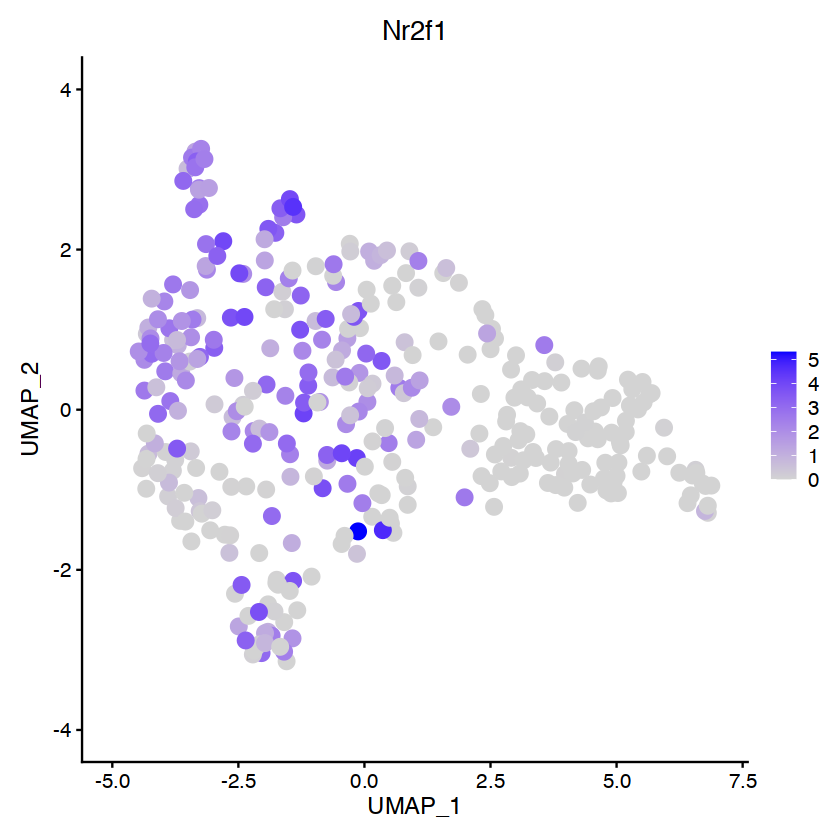

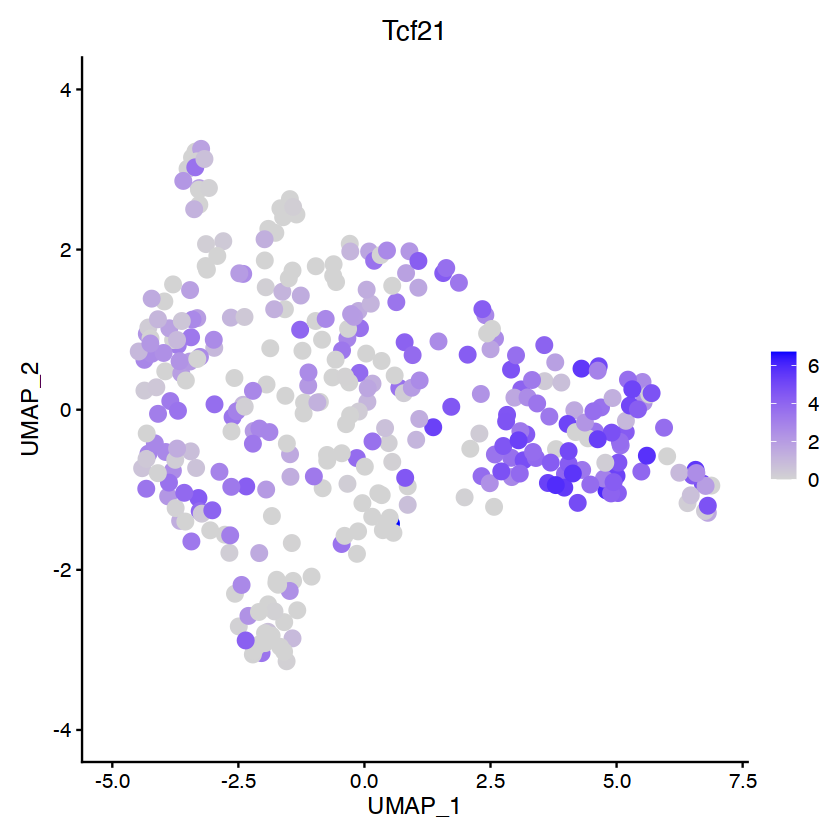

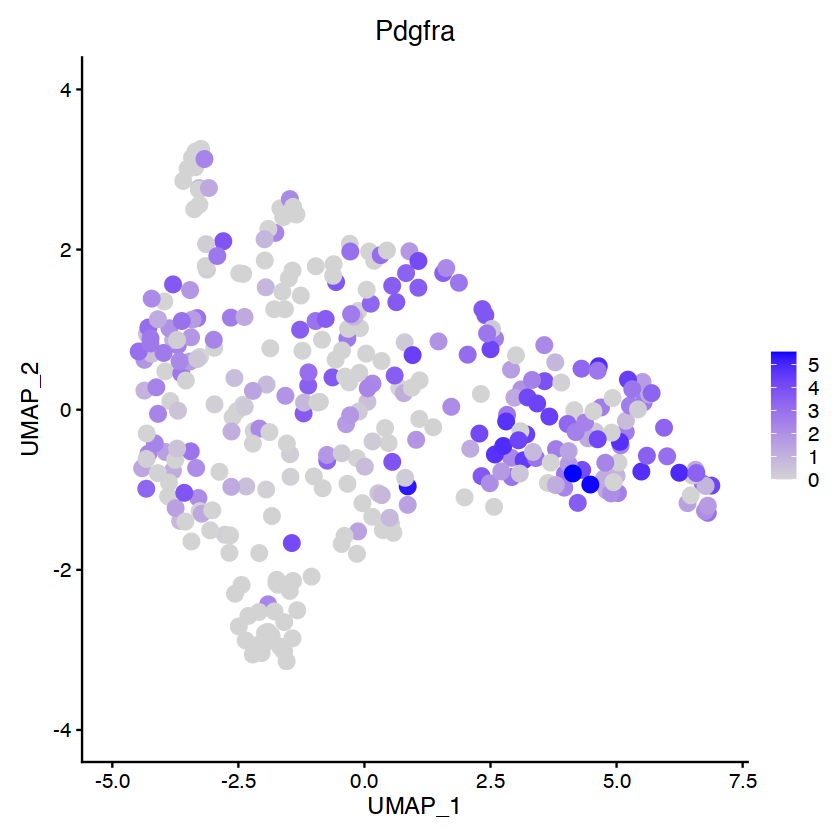

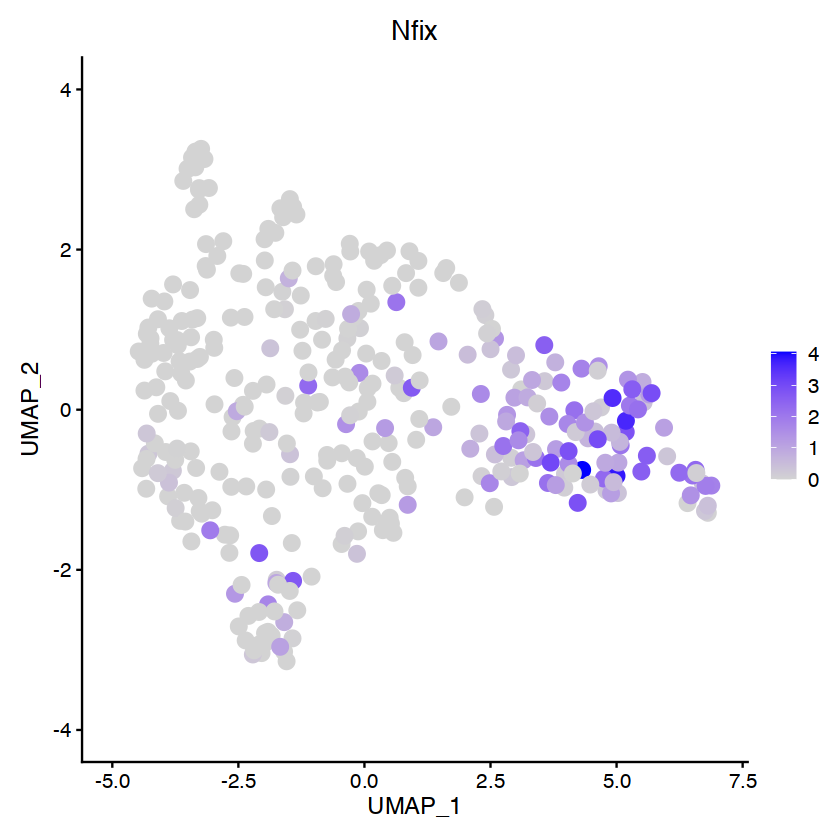

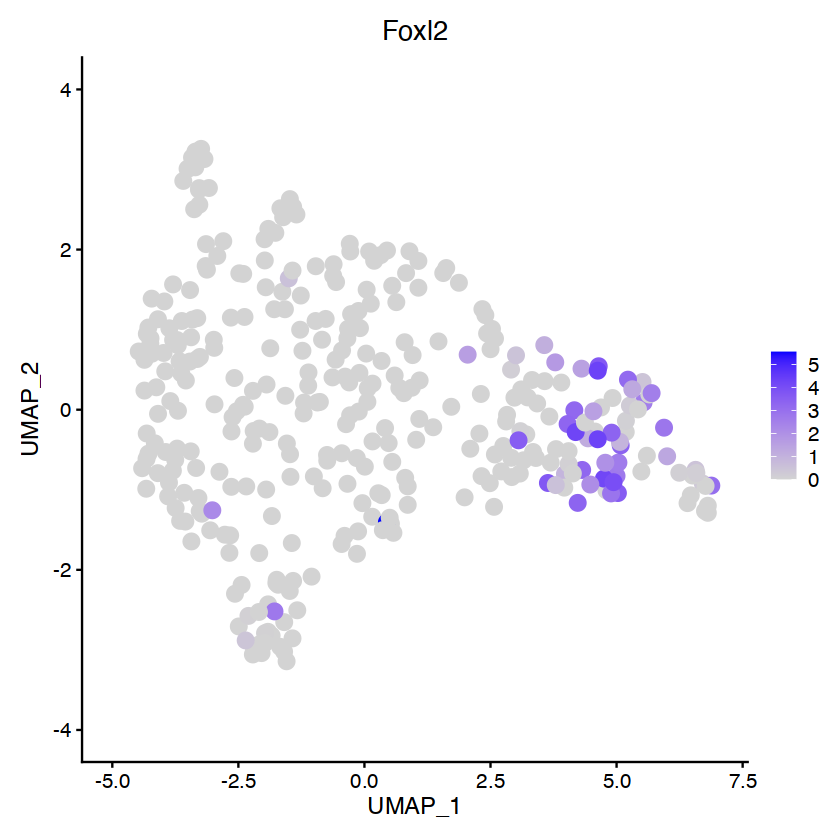

In [9]:
#Markers c('Col1a1','Nr2f1','Tcf21','Pdgfra','Nfix','Foxl2')
FeaturePlot(pbmc, features = 'Col1a1', pt.size =4)
FeaturePlot(pbmc, features = 'Nr2f1', pt.size =4)
FeaturePlot(pbmc, features = 'Tcf21', pt.size =4)
FeaturePlot(pbmc, features = 'Pdgfra', pt.size =4)
FeaturePlot(pbmc, features = 'Nfix', pt.size =4)
FeaturePlot(pbmc, features = 'Foxl2', pt.size =4)

<h1>Differential expreesion </h1>
All genes

In [10]:
library(dplyr)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
load("data/ovaryE11-P5-named-DEG-allC.Rdata")
pbmc

An object of class Seurat 
43346 features across 349 samples within 1 assay 
Active assay: RNA (43346 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [12]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones 90
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.90, logfc.threshold = 0.25)

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



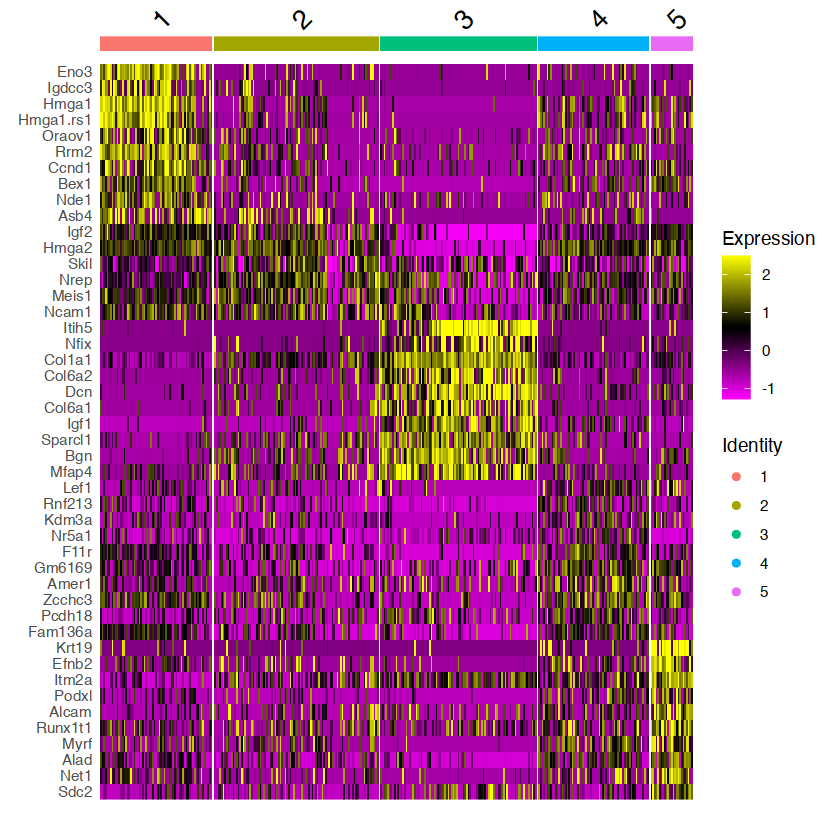

In [13]:
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(pbmc, features = top10$gene) 

In [14]:
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 3, wt = avg_log2FC) -> top3
top3

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.502805e-30,1.4832560,0.925,0.255,1.951786e-25,1,Eno3
8.616839e-28,1.1142358,0.925,0.259,3.735055e-23,1,Igdcc3
4.318277e-26,1.1319870,0.955,0.429,1.871801e-21,1,Hmga1
2.182193e-07,0.3256846,0.949,0.809,9.458934e-03,2,Igf2
3.612403e-07,0.3495907,0.969,0.789,1.565832e-02,2,Hmga2
2.661672e-04,0.2770331,0.929,0.912,1.000000e+00,2,Ncam1
5.719600e-52,1.9460434,0.914,0.105,2.479218e-47,3,Itih5
1.985556e-35,1.5465661,0.946,0.352,8.606590e-31,3,Dcn
1.805676e-33,1.4089457,0.925,0.309,7.826883e-29,3,Col6a1


In [15]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones min.pct = 0.40
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.40, logfc.threshold = 0.25)

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [16]:
top200 =pbmc.markers %>%
    group_by(cluster) %>%
    slice_max(n = 200, order_by = avg_log2FC)
head(top200)
dim(top200)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.424704e-37,1.530321,0.687,0.046,6.175523e-33,1,Lin28a
4.502805e-30,1.483256,0.925,0.255,1.951786e-25,1,Eno3
1.519980e-26,1.437990,0.567,0.057,6.588505e-22,1,Arg1
8.830163e-16,1.309212,0.597,0.160,3.827523e-11,1,Adh1
1.136970e-28,1.257081,0.821,0.195,4.928311e-24,1,Gm14226
1.744126e-39,1.224909,0.866,0.106,7.560088e-35,1,Trim71


[1] 840   7

In [17]:
top200[top200$gene == "Nfix",]

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.309151e-40,0.9964328,0.946,0.199,5.674648e-36,3,Nfix


In [18]:
top3 <- pbmc.markers %>%
    group_by(cluster) %>%
    slice_max(n = 3, order_by = avg_log2FC)
top3

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.424704e-37,1.5303210,0.687,0.046,6.175523e-33,1,Lin28a
4.502805e-30,1.4832560,0.925,0.255,1.951786e-25,1,Eno3
1.519980e-26,1.4379896,0.567,0.057,6.588505e-22,1,Arg1
8.093672e-10,0.8648626,0.429,0.143,3.508283e-05,2,Cthrc1
1.280592e-04,0.5612500,0.439,0.263,1.000000e+00,2,Itga8
1.981667e-04,0.5504299,0.582,0.438,1.000000e+00,2,Pdgfrb
5.719600e-52,1.9460434,0.914,0.105,2.479218e-47,3,Itih5
1.647292e-32,1.8252240,0.710,0.109,7.140352e-28,3,Lum
5.287347e-36,1.7636245,0.817,0.172,2.291853e-31,3,Cfh


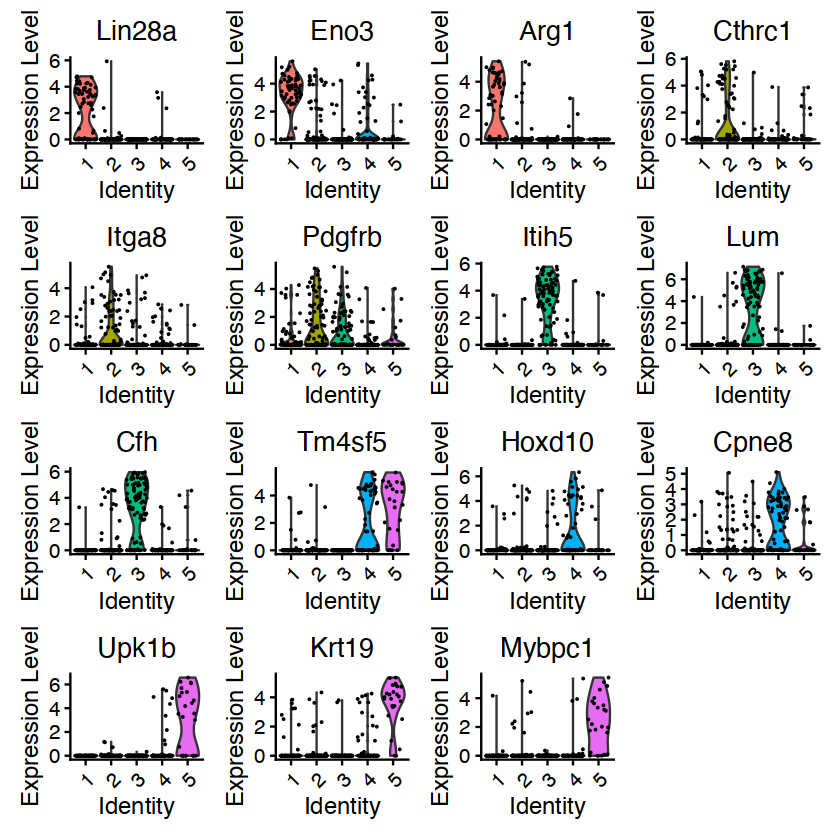

In [19]:
VlnPlot(pbmc, features = top3$gene)

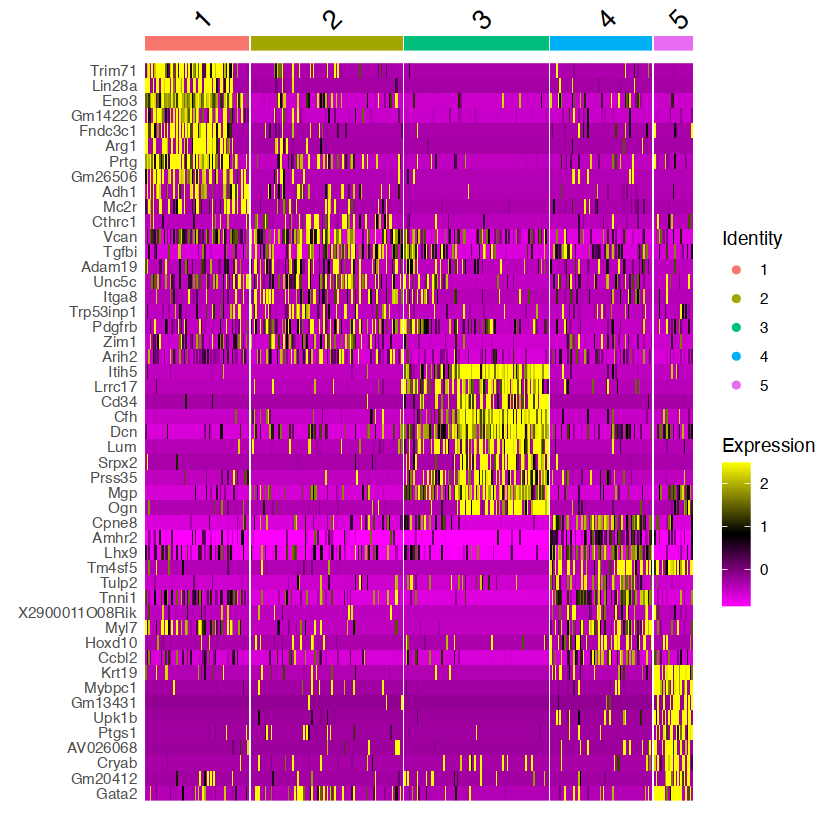

In [20]:
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(pbmc, features = top10$gene) 

<h1>
Transcription factors that are differential expresseed between clusters</h1>

In [21]:
 allGenes = row.names (pbmc)
head(allGenes)

[1] "Gnai3" "Pbsn"  "Cdc45" "H19"   "Scml2" "Apoh"

In [22]:
#List of transcription factors in MotifDb
library(MotifDb)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required p

In [23]:
MotifDb

MotifDb object of length 12657
| Created from downloaded public sources, last update: 2022-Mar-04
| 12657 position frequency matrices from 22 sources:
|         cisbp_1.02:  874
|    FlyFactorSurvey:  614
|        HOCOMOCOv10: 1066
| HOCOMOCOv11-core-A:  181
| HOCOMOCOv11-core-B:   84
| HOCOMOCOv11-core-C:  135
| HOCOMOCOv11-secondary-A:   46
| HOCOMOCOv11-secondary-B:   19
| HOCOMOCOv11-secondary-C:   13
| HOCOMOCOv11-secondary-D:  290
|              HOMER:  332
|               hPDI:  437
|        JASPAR_2014:  592
|        JASPAR_CORE:  459
|         jaspar2016: 1209
|         jaspar2018: 1564
|         jaspar2022: 1956
|          jolma2013:  843
|             ScerTF:  196
|            stamlab:  683
|       SwissRegulon:  684
|           UniPROBE:  380
| 62 organism/s
|           Hsapiens: 6075
|          Mmusculus: 1554
|      Dmelanogaster: 1437
|          Athaliana: 1371
|        Scerevisiae: 1221
|                 NA:  184
|              other:  815
Scerevisiae-cisbp_1.02-M0001_1

In [24]:
allTF = values (MotifDb)$geneSymbol
length(allTF)

[1] 12657

In [25]:
TFinDataset = allGenes[toupper(allGenes) %in% toupper(allTF)]
head(TFinDataset)
length(TFinDataset)

[1] "Klf6"  "Scmh1" "Tbx2"  "Tbx4"  "Tfe3"  "Lhx2"

[1] 1086

In [26]:
pbmc$ClusterAllGenes <- Idents(pbmc)

In [27]:
topTF = top200[top200$gene %in% TFinDataset,]
top5TF <- topTF %>%
    group_by(cluster) %>%
    slice_max(n = 5, order_by = avg_log2FC)
top5TF

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.782268e-24,1.1641723,0.806,0.199,1.206002e-19,1,Fhl1
4.318277e-26,1.1319870,0.955,0.429,1.871801e-21,1,Hmga1
1.490773e-21,1.1072228,0.881,0.259,6.461905e-17,1,Kif22
1.607803e-28,1.0444402,0.612,0.053,6.969183e-24,1,Sall4
4.612893e-26,0.9312216,0.881,0.202,1.999504e-21,1,Foxc1
6.710326e-04,0.3884901,0.418,0.231,1.000000e+00,2,Gata2
2.662467e-04,0.3621887,0.735,0.538,1.000000e+00,2,Nr2f1
3.612403e-07,0.3495907,0.969,0.789,1.565832e-02,2,Hmga2
2.374685e-04,0.3365969,0.816,0.705,1.000000e+00,2,Meis2


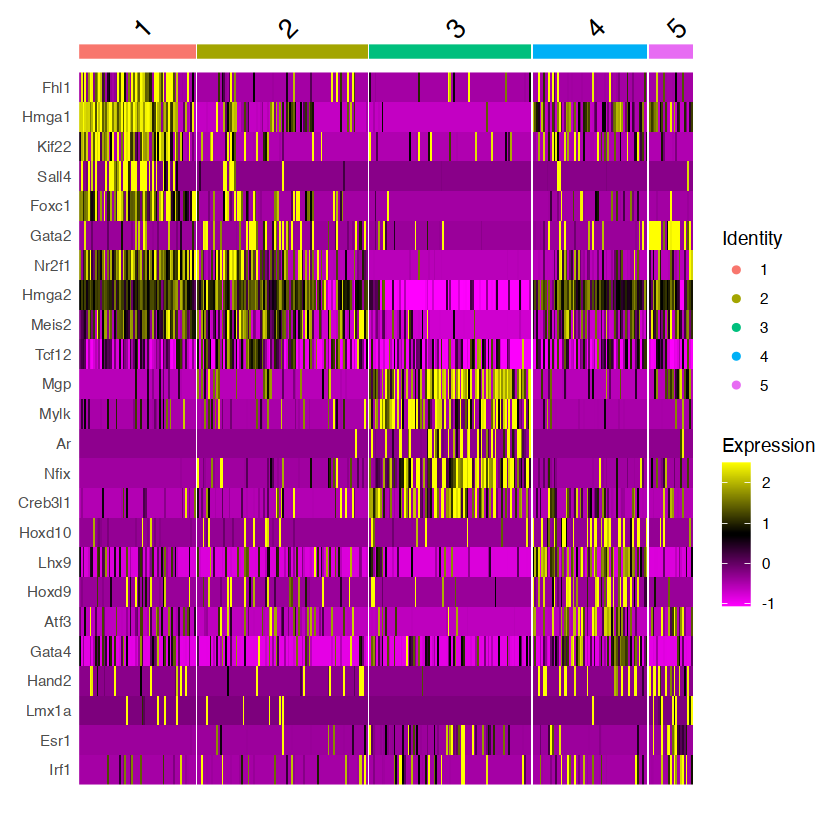

In [28]:

DoHeatmap(pbmc, features = top5TF$gene) 

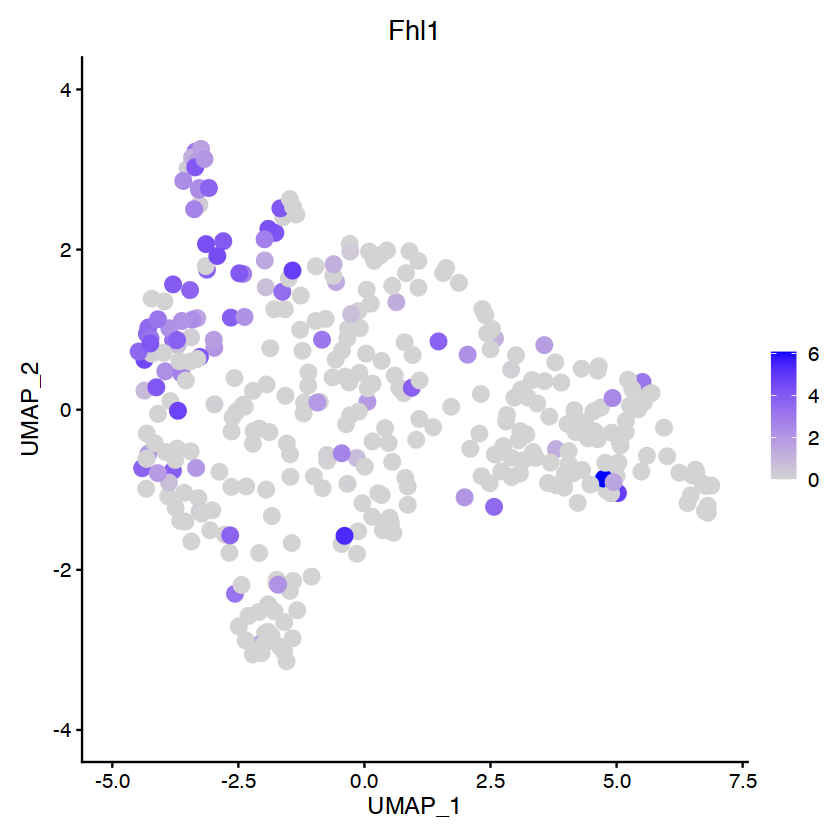

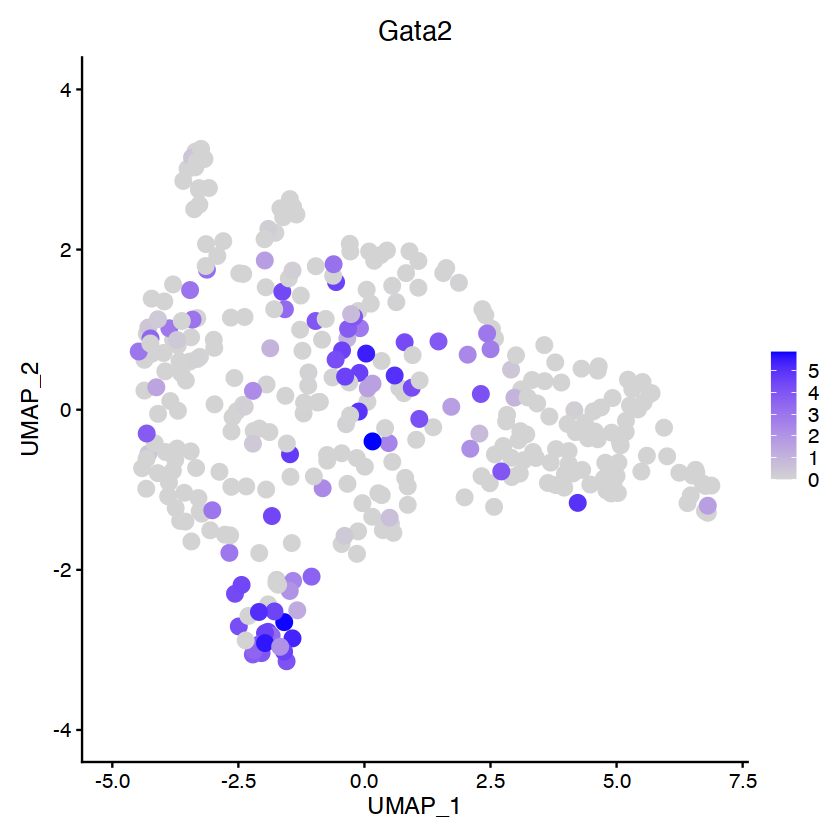

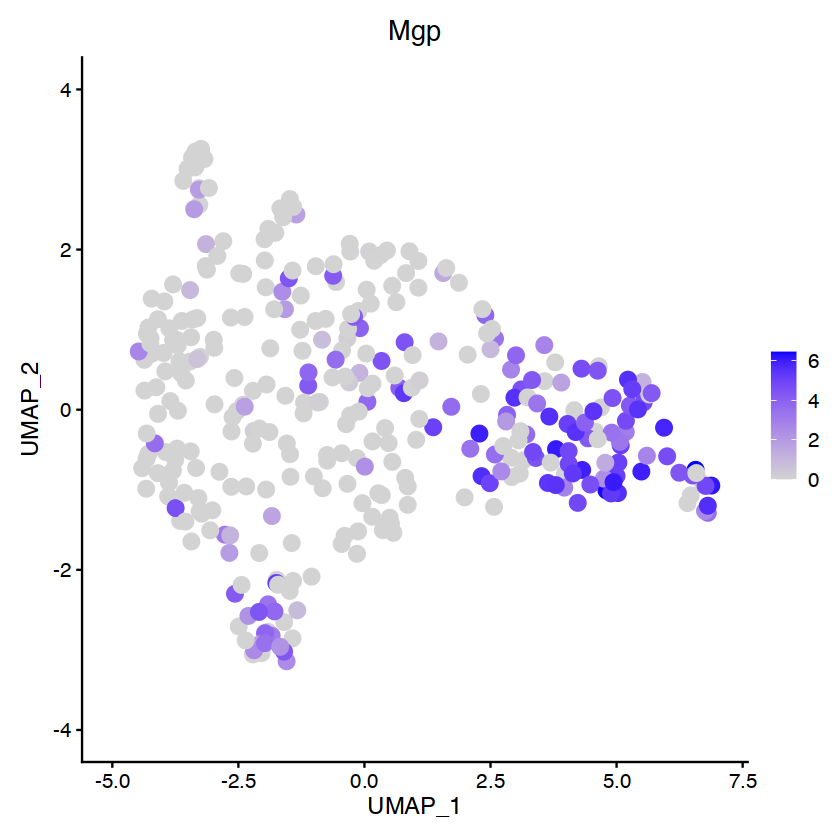

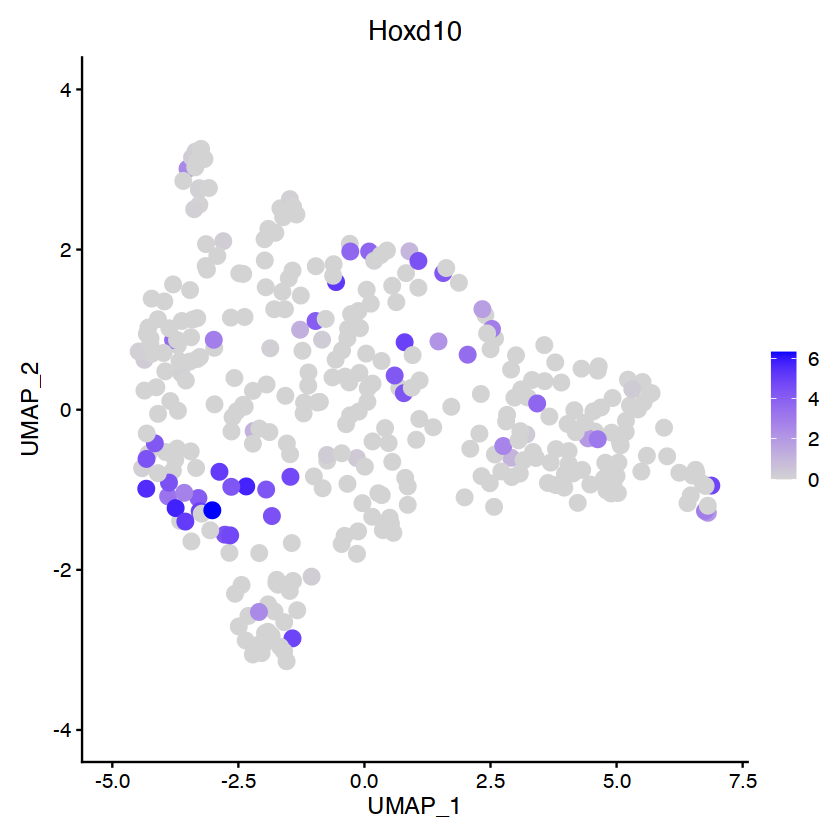

In [29]:
FeaturePlot(pbmc, features = 'Fhl1', pt.size =4)
FeaturePlot(pbmc, features = 'Gata2', pt.size =4)
FeaturePlot(pbmc, features = 'Mgp', pt.size =4)
FeaturePlot(pbmc, features = 'Hoxd10', pt.size =4)

In [30]:
save(pbmc, file = "data/ovaryE11-P5-named-DEG-allC.Rdata")

In [31]:
load("data/ovaryE11-P5-named-DEG-allC.Rdata")
pbmc

An object of class Seurat 
43346 features across 349 samples within 1 assay 
Active assay: RNA (43346 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

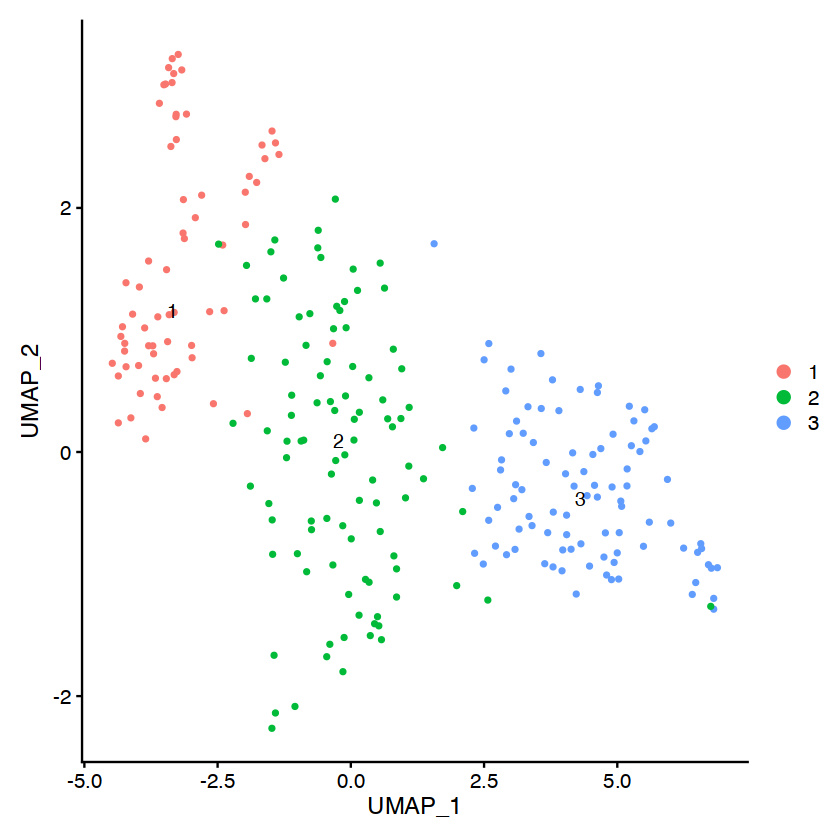

In [32]:
#Theca Dev Clusters
pbmc = subset(x = pbmc, idents = c("4","5"), invert = TRUE)
DimPlot(pbmc, reduction = "umap", label =TRUE)

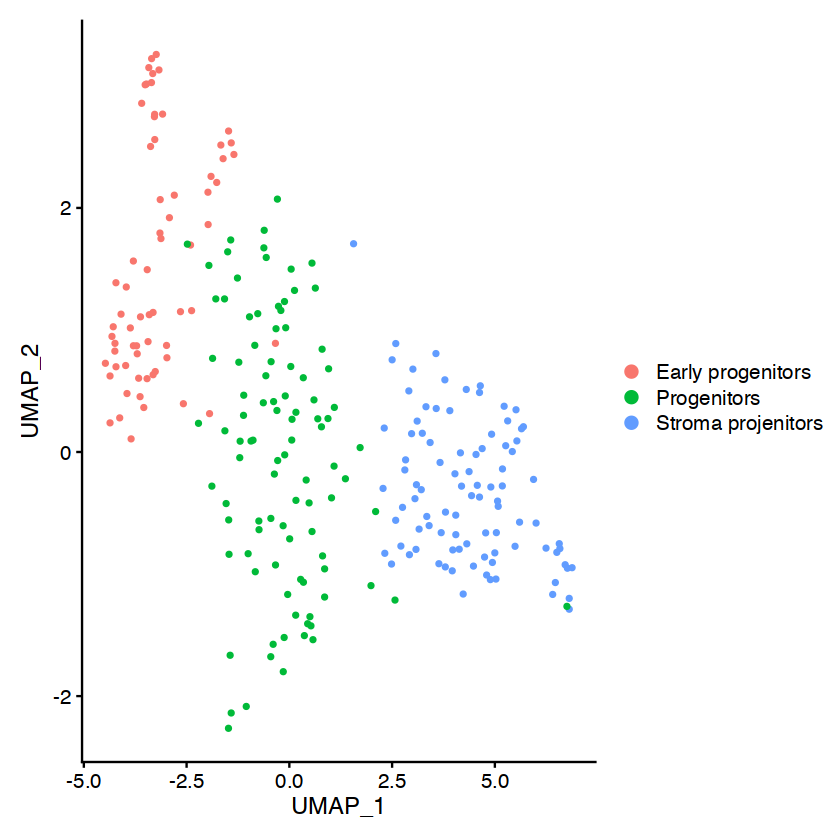

In [33]:
pbmc <- RenameIdents(pbmc, '1' = 'Early progenitors', 
                     '2' = 'Progenitors',
                                '3' = 'Stroma projenitors' )

DimPlot(pbmc, reduction = "umap")

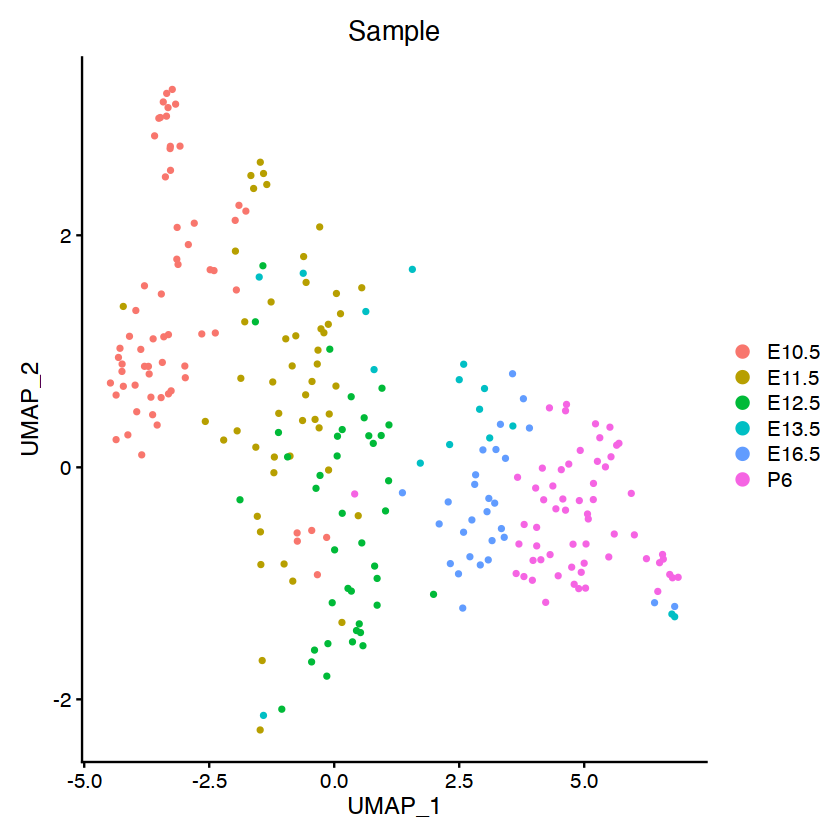

In [34]:
DimPlot(pbmc, reduction = "umap", group.by = "Sample")

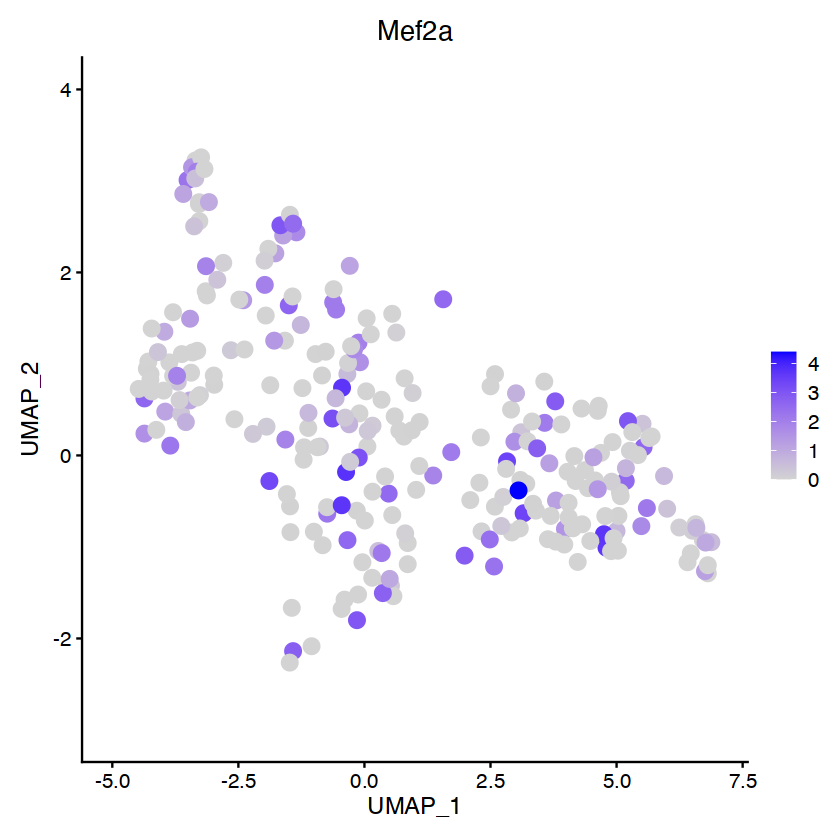

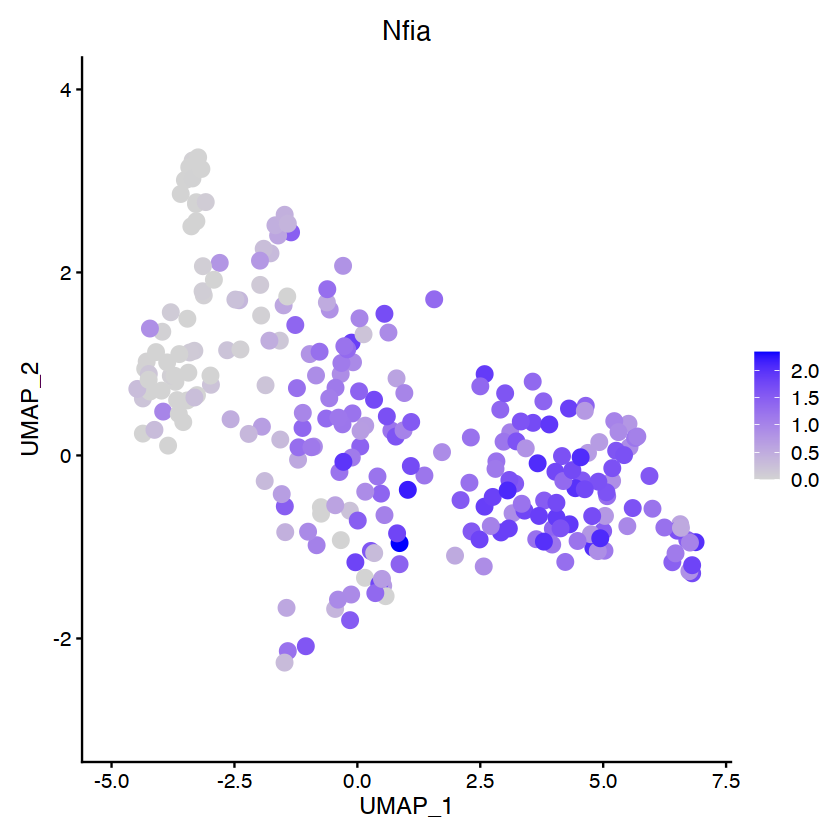

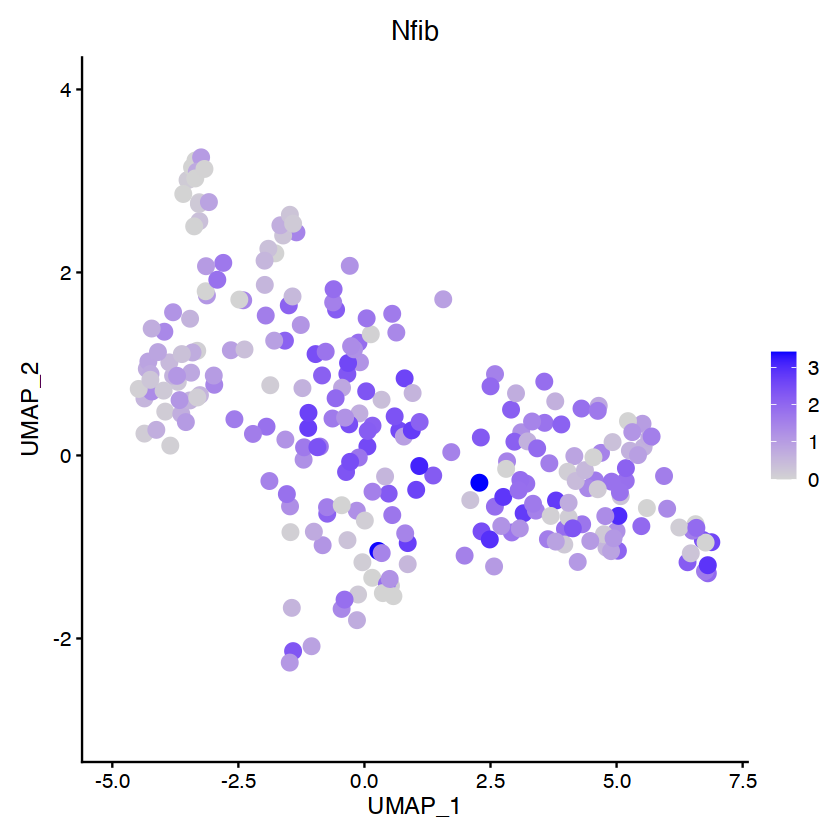

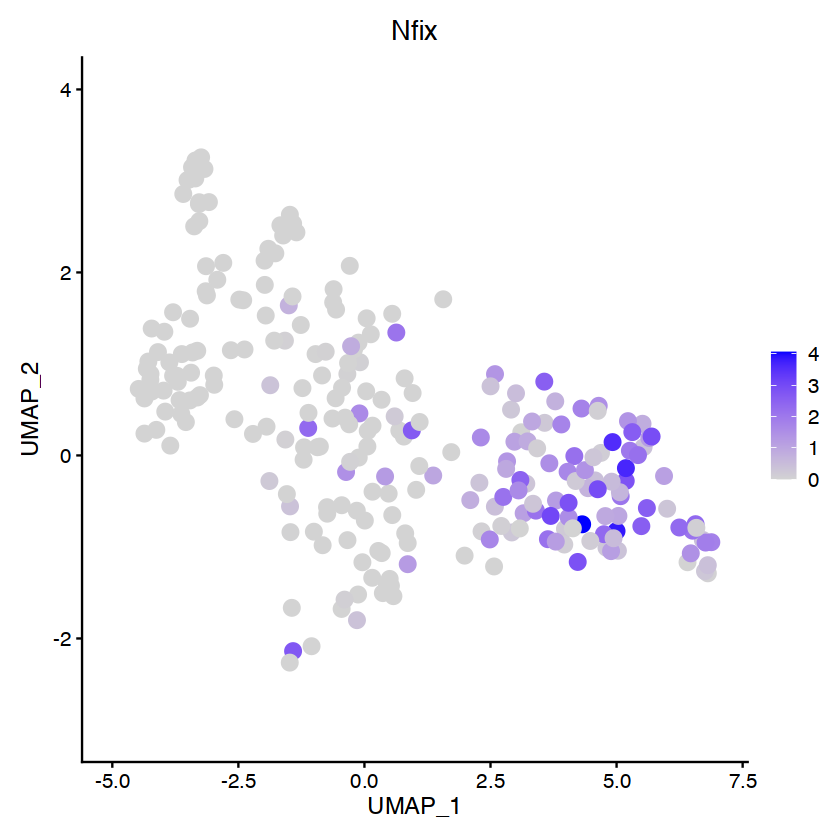

In [35]:
FeaturePlot(pbmc, features = 'Mef2a', pt.size =4)
FeaturePlot(pbmc, features = 'Nfia', pt.size =4)
FeaturePlot(pbmc, features = 'Nfib', pt.size =4)
FeaturePlot(pbmc, features = 'Nfix', pt.size =4)


In [36]:
# find all markers of cluster 3
cluster3.markers <- FindMarkers(pbmc, ident.1 = 3, ident.2 =2, min.pct = 0.40)
cluster3.markers$cluster = 3
cluster3.markersUP <- cluster3.markers[cluster3.markers$avg_log2FC>0,]
cluster3.markersUP$dir = "up"
cluster3.markersUP <-cluster3.markersUP[order(cluster3.markersUP$p_val, -cluster3.markersUP$avg_log2FC),]

head(cluster3.markersUP)
dim(cluster3.markersUP)
write.csv(cluster3.markersUP,"data/deg_cluste2_3_all_up.csv", row.names = FALSE)
save(cluster3.markersUP, file = "data/ovaryE11-P5-cluste2_3_all_up.DEG.Rdata")



ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: 3


In [ ]:
# find all markers of cluster 3 down

cluster3.markersD <- cluster3.markers[cluster3.markers$avg_log2FC<0,]
cluster3.markersD$dir = "down"
cluster3.markersD <-cluster3.markersD[order(cluster3.markersD$p_val, cluster3.markersD$avg_log2FC),]

head(cluster3.markersD)
dim(cluster3.markersD)
write.csv(cluster3.markersD,"data/deg_cluste2_3_all_down.csv", row.names = FALSE)
save(cluster3.markersD, file = "data/ovaryE11-P5-cluste2_3_all_down.DEG.Rdata")

In [ ]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2, ident.2 =1, min.pct = 0.40)
cluster2.markers$cluster = 2
cluster2.markersUP <- cluster2.markers[cluster2.markers$avg_log2FC>0,]
cluster2.markersUP$dir = "up"
cluster2.markersUP <-cluster2.markersUP[order(cluster2.markersUP$p_val, -cluster2.markersUP$avg_log2FC),]

head(cluster2.markersUP)
dim(cluster2.markersUP)
write.csv(cluster2.markersUP,"data/deg_cluste1_2_all_up.csv", row.names = FALSE)
save(cluster2.markersUP, file = "data/ovaryE11-P5-cluste21_2_all_up.DEG.Rdata")


In [ ]:
# find all markers of cluster 2 down

cluster2.markersD <- cluster2.markers[cluster2.markers$avg_log2FC<0,]
cluster2.markersD$dir = "down"
cluster2.markersD <-cluster2.markersD[order(cluster2.markersD$p_val, -cluster2.markersD$avg_log2FC),]

head(cluster2.markersD)
dim(cluster2.markersD)
write.csv(cluster2.markersD,"data/deg_cluste1_2_all_down.csv", row.names = FALSE)
save(cluster2.markersD, file = "data/ovaryE11-P5-cluste21_2_all_down.DEG.Rdata")


In [ ]:
save(pbmc, file = "data/ovaryE11-P5-named-DEG-c1-3.Rdata")

In [ ]:
load( "data/ovaryE11-P5-named-DEG-c1-3.Rdata")
pbmc

In [ ]:
cluste1_2.DEG = rbind(cluster2.markersUP,cluster2.markersD)
dim(cluste1_2.DEG)

In [ ]:
cluste2_3.DEG = rbind(cluster3.markersUP,cluster3.markersD)
dim(cluste2_3.DEG)

In [ ]:
cluste1_2.DEG$gene <- rownames(cluste1_2.DEG)
head(cluste1_2.DEG)

In [ ]:
EnhancedVolcano(cluste1_2.DEG,
                lab = cluste1_2.DEG$gene,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = '1 to 2',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 2.0,
                labSize = 4.0,
                caption = bquote(~Log[2]~ "fold change cutoff, 0.4; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")

<h3>Creat a list of genes based on the cutoff</h3>

In [ ]:
cluste1_2.DEG_CUT <-cluste1_2.DEG[order(cluste1_2.DEG$p_val, 
                                   -cluste1_2.DEG$avg_log2FC),]

cluste1_2.DEG_CUT <- cluste1_2.DEG_CUT[cluste1_2.DEG_CUT$avg_log2FC > 0.4 | 
                                       cluste1_2.DEG_CUT$avg_log2FC < -0.4,]
cluste1_2.DEG_CUT <- cluste1_2.DEG_CUT[cluste1_2.DEG_CUT$p_val < 10e-5 ,]
dim(cluste1_2.DEG_CUT)
head(cluste1_2.DEG_CUT)
write.csv(cluste1_2.DEG_CUT,"data/deg_cluste1_2_cut.csv", row.names = FALSE)
save(cluste1_2.DEG_CUT, file = "data/ovaryE11-P5-cluste1_2.DEG_cut.Rdata")

In [ ]:
cluste1_2.DEG.TF <- cluste1_2.DEG_CUT[cluste1_2.DEG_CUT$gene %in% TFinDataset,]

selectLab = rbind(cluste1_2.DEG.TF[cluste1_2.DEG.TF$dir == "up",][1:8,],
                    cluste1_2.DEG.TF[cluste1_2.DEG.TF$dir == "down",][1:8,]
                  )
EnhancedVolcano(cluste1_2.DEG,
                lab = cluste1_2.DEG$gene,
                selectLab = selectLab$gene,
                boxedLabels = TRUE,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = 'Cluster 1 vs 2',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 4.0,
                labSize = 6.0,
                labCol = 'black',
                labFace = 'bold',
                caption = bquote(~Log[2]~ "fold change cutoff, 0.4; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")



In [ ]:
cluste2_3.DEG$gene <- rownames(cluste2_3.DEG)
head(cluste2_3.DEG)

In [ ]:
EnhancedVolcano(cluste2_3.DEG,
                lab = cluste2_3.DEG$gene,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = '1 to 2',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 2.0,
                labSize = 4.0,
                caption = bquote(~Log[2]~ "fold change cutoff, 0.4; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")

<h3>Creat a list of genes based on the cutoff</h3>

In [ ]:
cluste2_3.DEG_CUT <-cluste2_3.DEG[order(cluste2_3.DEG$p_val, 
                                   -cluste2_3.DEG$avg_log2FC),]

cluste2_3.DEG_CUT <- cluste2_3.DEG_CUT[cluste2_3.DEG_CUT$avg_log2FC > 0.4 | 
                                       cluste2_3.DEG_CUT$avg_log2FC < -0.4,]
cluste2_3.DEG_CUT <- cluste2_3.DEG_CUT[cluste2_3.DEG_CUT$p_val < 10e-5 ,]
dim(cluste2_3.DEG_CUT)
head(cluste2_3.DEG_CUT)
write.csv(cluste2_3.DEG_CUT,"data/deg_cluste2_3_cut.csv", row.names = FALSE)
save(cluste2_3.DEG_CUT, file = "data/ovaryE11-P5-cluste2_3.DEG_cut.Rdata")

In [ ]:
cluste2_3.DEG.TF <- cluste2_3.DEG_CUT[cluste2_3.DEG_CUT$gene %in% TFinDataset,]

selectLab = rbind(cluste2_3.DEG.TF[cluste2_3.DEG.TF$dir == "up",][1:6,],
                    cluste2_3.DEG.TF[cluste2_3.DEG.TF$dir == "down",][1:6,]
                  )
EnhancedVolcano(cluste2_3.DEG,
                lab = cluste2_3.DEG$gene,
                selectLab = selectLab$gene,
                boxedLabels = TRUE,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = 'Cluster 2 vs 3',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 4.0,
                labSize = 6.0,
                labCol = 'black',
                labFace = 'bold',
                caption = bquote(~Log[2]~ "fold change cutoff, 0.4; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")



In [ ]:
cluste1_2.DEG.TF <- cluste1_2.DEG[cluste1_2.DEG$gene %in% TFinDataset,]

EnhancedVolcano(cluste1_2.DEG.TF,
                lab = cluste1_2.DEG.TF$gene,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = '1 to 2',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 3.0,
                labSize = 4.0,
                caption = bquote(~Log[2]~ "fold change cutoff, 0.5; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")

In [ ]:
EnhancedVolcano(cluste1_2.DEG.TF,
    lab = cluste1_2.DEG.TF$gene,
    x = 'avg_log2FC',
    y = 'p_val',
    selectLab = c('Nfia','Nfib','Hmga1','Eno1','Meis3','Sall4','Mrpl2','Abcf2'),
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 10e-5,
    FCcutoff = 0.4,
    pointSize = 4.0,
    labSize = 6.0,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 4/5,
   
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black')

In [ ]:
cluste2_3.DEG.TF <- cluste2_3.DEG[cluste2_3.DEG$gene %in% TFinDataset,]

EnhancedVolcano(cluste2_3.DEG.TF,
                lab = cluste2_3.DEG.TF$gene,
                x = 'avg_log2FC',
                y = 'p_val',
                ylim = 0,
                title = '2 to 3',
                pCutoff = 10e-5,
                FCcutoff = 0.4,
                pointSize = 3.0,
                labSize = 4.0,
                caption = bquote(~Log[2]~ "fold change cutoff, 0.5; p-value cutoff, 10e-5"),
                subtitle = "Differential expression")

In [ ]:
EnhancedVolcano(cluste2_3.DEG.TF,
    lab = cluste2_3.DEG.TF$gene,
    x = 'avg_log2FC',
    y = 'p_val',
    selectLab = c('Nfix','Tcf21','Ar','Foxl2','Msrb3',
      'Hmga2','Nr2f1','Meis2','Sox11','Id1'),
    xlab = bquote(~Log[2]~ 'fold change'),
    pCutoff = 10e-5,
    FCcutoff = 0.4,
    pointSize = 4.0,
    labSize = 6.0,
    labCol = 'black',
    labFace = 'bold',
    boxedLabels = TRUE,
    colAlpha = 4/5,
   
    legendLabSize = 14,
    legendIconSize = 4.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black')